In [1]:
import os
import sys

sys.path.append('..')
os.chdir('..')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from src.data import transform
from src.tools import dataframe_utils
from src.visualization import data_plots

2023-03-20 18:42:33 - INFO - startup.py - initialize_logger: Logger initialized


## Constants

In [3]:
raw_folder = os.path.join('data', 'raw')
arca_folder = os.path.join(raw_folder, 'ARCA')

arca_filename = 'Analytics ARCA Informe Metaglam revistes avant 20210101-20230301.xlsx'
arca_analytics_filepath = os.path.join(arca_folder, arca_filename)

parse_dates = [
    'Data',
]

numeric_columns = [
    'Usuaris',
    'Visualitzacions de pàgina',
]

## Extract

In [4]:
df = pd.read_excel(arca_analytics_filepath, parse_dates=parse_dates, skipfooter=1) \
    .sort_values('Data') \
    .reset_index(drop=True)

## Transform

Compute total number of users and views for each day

In [5]:
grouped_df = df \
    .groupby('Data') \
    .sum(numeric_only=True)

For date column compute the one hot encoding for year and month

In [6]:
df = transform.compute_date_features(df, 'Data')

Clean column 'Títol de la pàgina'

In [7]:
splitted_text = df['Títol de la pàgina'].str.split('>')

df['category'] = splitted_text.str[0].str.strip()
df['title'] = splitted_text.str[1].str.split(':').str[0]
df['full_title'] = splitted_text.str[1]

## Analysis

### Numeric columns
- Usuaris
- Visualitzacions de pàgina

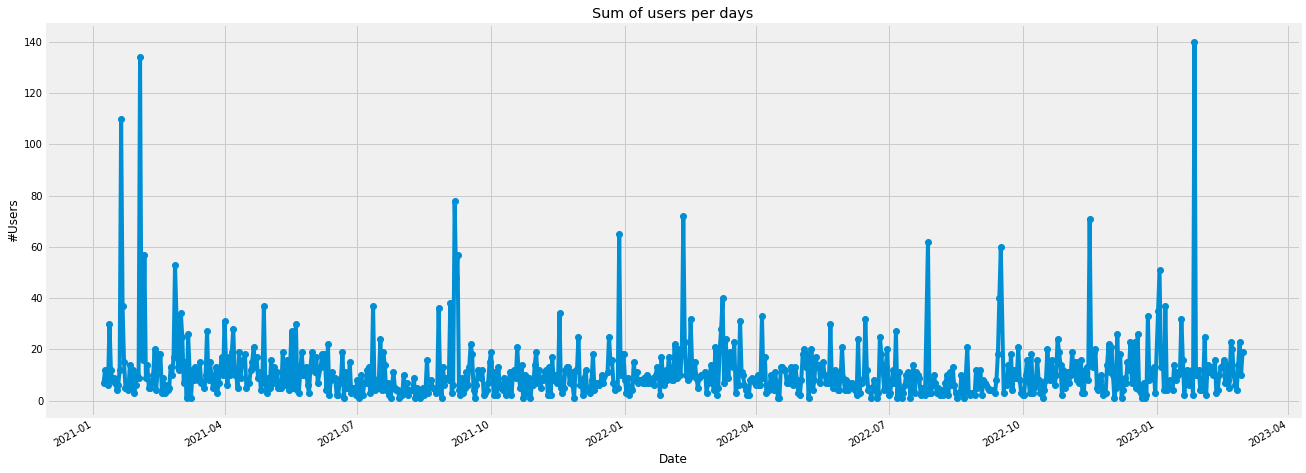

In [8]:
_ = grouped_df.plot(
    kind='line', marker='o', y='Usuaris', figsize=(20, 8), 
    title='Sum of users per days', xlabel='Date', ylabel='#Users', 
    legend=None)

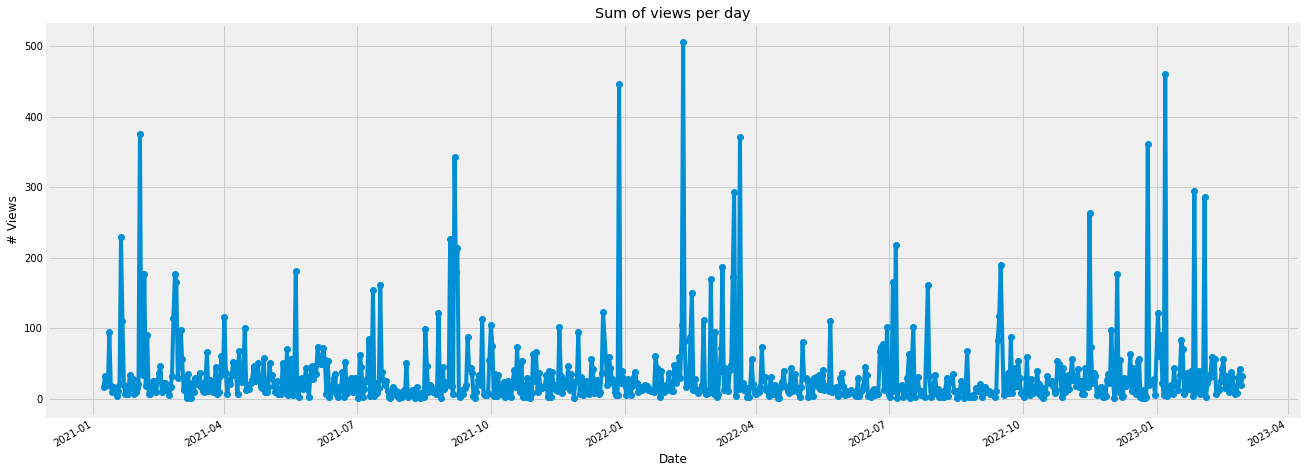

In [9]:
_ = grouped_df.plot(
    kind='line', marker='o', y='Visualitzacions de pàgina', figsize=(20, 8), 
    title='Sum of views per day', xlabel='Date', ylabel='# Views', legend=None)

### Categorical features
- Category
- País
- Ciutat
- Idioma
- Month
- Year

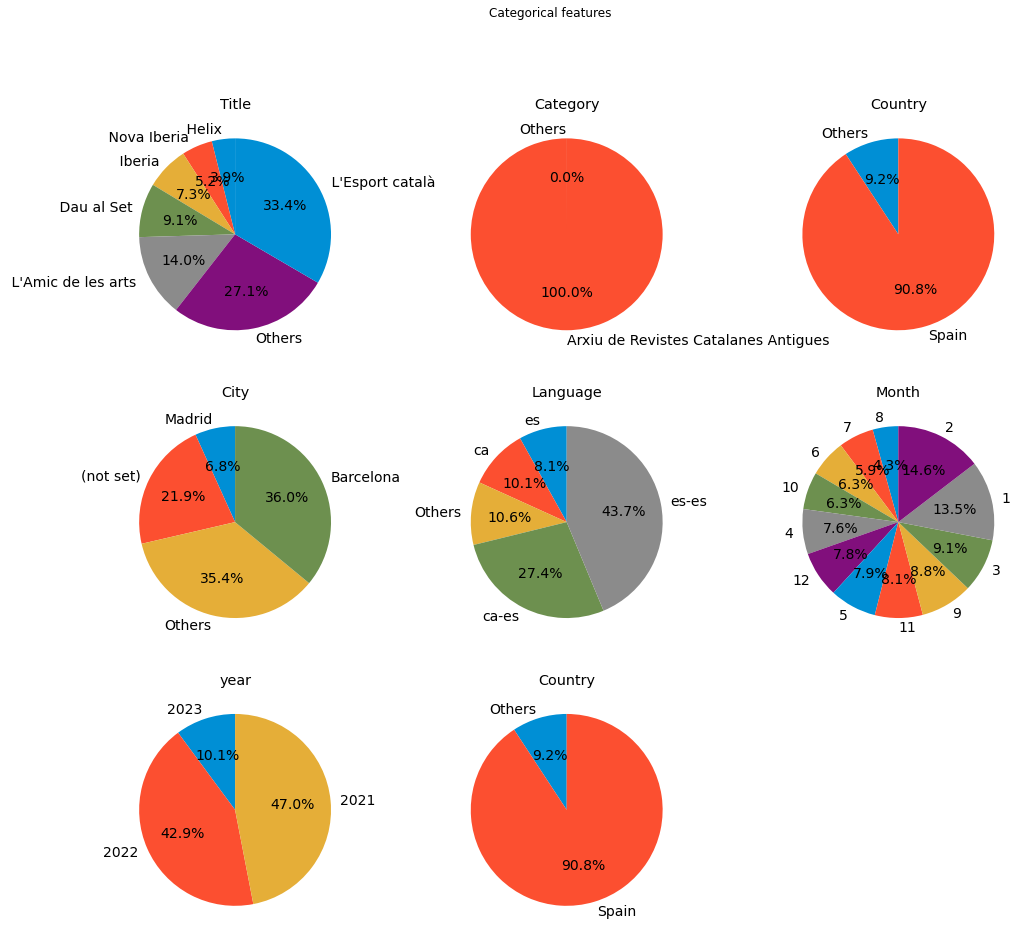

In [10]:
fig = plt.figure(figsize=(15, 15))
fig.suptitle('Categorical features')

ax = fig.add_subplot(331)
data_plots.create_pie_chart_with_grouped_threshold(
    df, 'title', ax, 'Title', threshold=.031)

ax = fig.add_subplot(332)
data_plots.create_pie_chart_with_grouped_threshold(
    df, 'category', ax, 'Category', threshold=.017)

ax = fig.add_subplot(333)
data_plots.create_pie_chart_with_grouped_threshold(
    df, 'País', ax, 'Country', threshold=.017)

ax = fig.add_subplot(334)
data_plots.create_pie_chart_with_grouped_threshold(
    df, 'Ciutat', ax, 'City', threshold=.019)

ax = fig.add_subplot(335)
data_plots.create_pie_chart_with_grouped_threshold(
    df, 'Idioma', ax, 'Language', threshold=.033)

ax = fig.add_subplot(336)
data_plots.create_pie_chart_with_grouped_threshold(
    df, 'month', ax, 'Month')

ax = fig.add_subplot(337)
data_plots.create_pie_chart_with_grouped_threshold(
    df, 'year', ax, 'year')

ax = fig.add_subplot(338)
data_plots.create_pie_chart_with_grouped_threshold(
    df, 'País', ax, 'Country', threshold=.017)